In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import datetime
import pandas as pd
import yfinance as yf

In [48]:
start = '2005-01-01'
end = '2021-12-31'

start_date = datetime.strptime(start, '%Y-%m-%d')
end_date = datetime.strptime(end, '%Y-%m-%d')


# yfinance module to get the stock data
data = yf.download('AMZN', start=start_date, end=end_date)


# Converting data to Pandas DataFrame
df = pd.DataFrame(data)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,2.2475,2.2720,2.2105,2.2260,2.2260,208930000
2005-01-04,2.1335,2.1630,2.0750,2.1070,2.1070,388370000
2005-01-05,2.0785,2.1380,2.0780,2.0885,2.0885,167084000
2005-01-06,2.0905,2.1125,2.0450,2.0525,2.0525,174018000
2005-01-07,2.0690,2.1345,2.0580,2.1160,2.1160,196732000


In [49]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,170.427994,171.975006,170.149994,171.068497,171.068497,36788000
2021-12-27,171.037003,172.942993,169.215500,169.669495,169.669495,58688000
2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000
2021-12-29,170.839996,171.212006,168.600494,169.201004,169.201004,35754000
2021-12-30,169.699997,170.888000,168.524002,168.644501,168.644501,37584000


In [50]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,2.2475,2.2720,2.2105,2.2260,2.2260,208930000
1,2005-01-04,2.1335,2.1630,2.0750,2.1070,2.1070,388370000
2,2005-01-05,2.0785,2.1380,2.0780,2.0885,2.0885,167084000
3,2005-01-06,2.0905,2.1125,2.0450,2.0525,2.0525,174018000
4,2005-01-07,2.0690,2.1345,2.0580,2.1160,2.1160,196732000


In [51]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,2.2475,2.2720,2.2105,2.2260,208930000
1,2.1335,2.1630,2.0750,2.1070,388370000
2,2.0785,2.1380,2.0780,2.0885,167084000
3,2.0905,2.1125,2.0450,2.0525,174018000
4,2.0690,2.1345,2.0580,2.1160,196732000


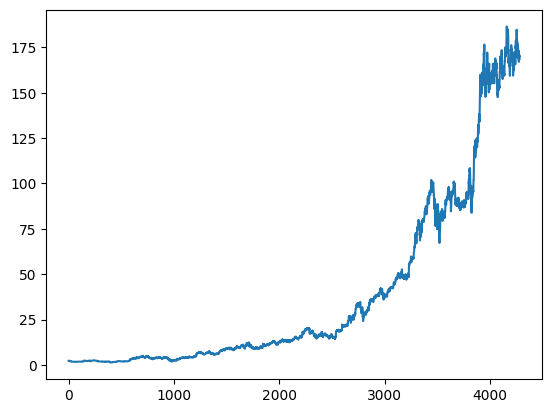

In [52]:
plt.plot(df.Close)

In [53]:
df

,Open,High,Low,Close,Volume
0,2.247500,2.272000,2.210500,2.226000,208930000
1,2.133500,2.163000,2.075000,2.107000,388370000
2,2.078500,2.138000,2.078000,2.088500,167084000
3,2.090500,2.112500,2.045000,2.052500,174018000
4,2.069000,2.134500,2.058000,2.116000,196732000
...,...,...,...,...,...
4274,170.427994,171.975006,170.149994,171.068497,36788000
4275,171.037003,172.942993,169.215500,169.669495,58688000
4276,170.182495,172.175995,169.135498,170.660995,54638000
4277,170.839996,171.212006,168.600494,169.201004,35754000


In [54]:
ma50 = df.Close.rolling(50).mean()
ma50

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4274    172.844941
4275    172.938471
4276    172.942671
4277    172.879951
4278    172.808690
Name: Close, Length: 4279, dtype: float64

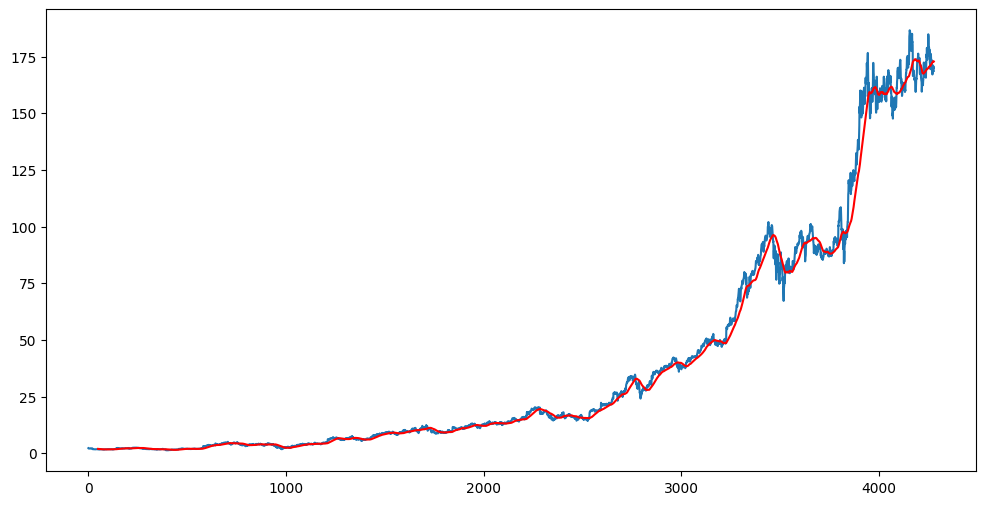

In [55]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma50, 'r')

In [56]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4274    170.163631
4275    170.182966
4276    170.201581
4277    170.221121
4278    170.236631
Name: Close, Length: 4279, dtype: float64

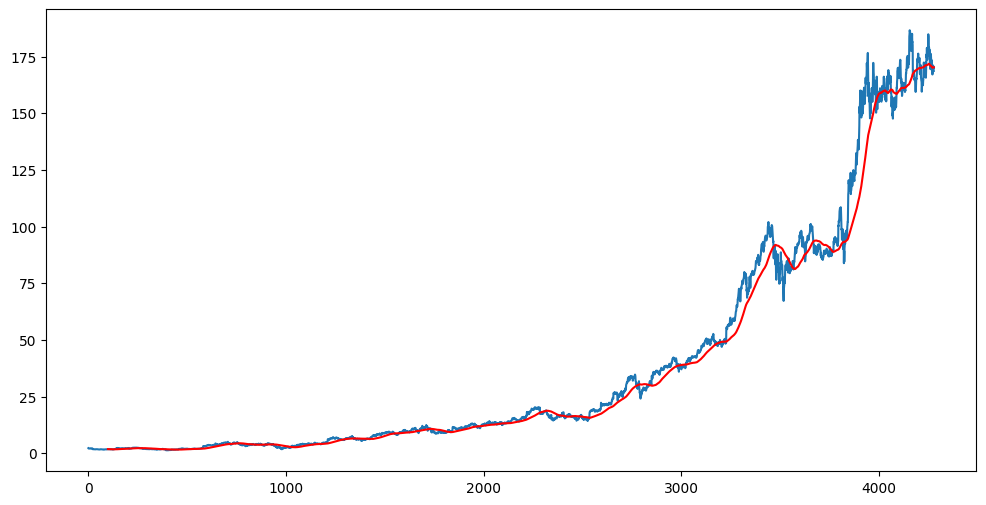

In [57]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [58]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4274    168.883118
4275    168.959093
4276    169.041978
4277    169.115018
4278    169.174308
Name: Close, Length: 4279, dtype: float64

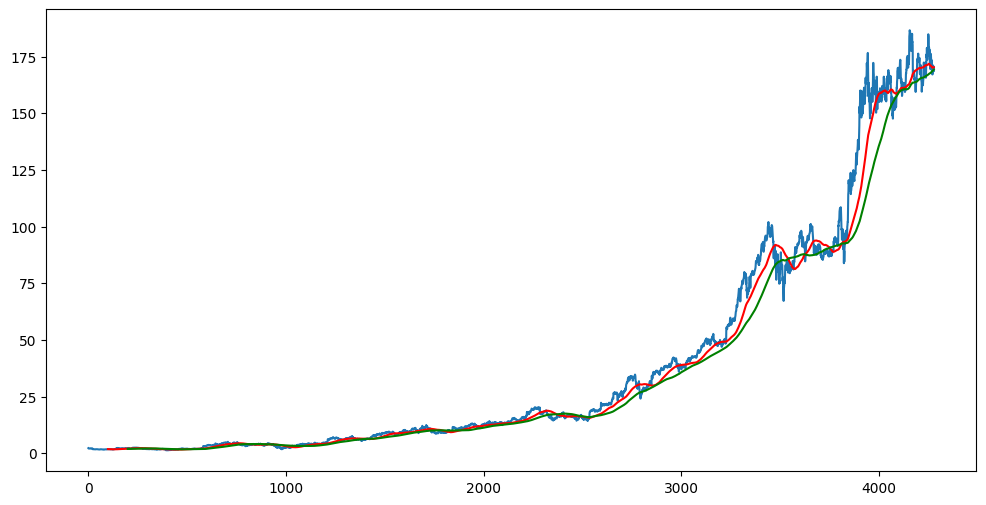

In [59]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [60]:
df.shape

(4279, 5)

In [61]:
# Splitting the Data into Two Parts Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2995, 1)
(1284, 1)


In [62]:
data_training.head()

,Close
0,2.2260
1,2.1070
2,2.0885
3,2.0525
4,2.1160


In [63]:
data_testing.head()

,Close
2995,39.006001
2996,39.018501
2997,38.338501
2998,38.125999
2999,37.528500


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [65]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02254702],
       [0.01963852],
       [0.01918635],
       ...,
       [0.89710251],
       [0.92134821],
       [0.92786176]])

In [66]:
data_training_array.shape

(2995, 1)

In [67]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [68]:
x_train.shape

(2895, 100, 1)

In [69]:
# Machine Learning Model Creation

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [70]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [72]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
91/91 [==============================] - 17s 134ms/step - loss: 0.0182
Epoch 2/50
91/91 [==============================] - 11s 118ms/step - loss: 0.0046
Epoch 3/50
91/91 [==============================] - 11s 116ms/step - loss: 0.0033
Epoch 4/50
91/91 [==============================] - 11s 116ms/step - loss: 0.0031
Epoch 5/50
91/91 [==============================] - 11s 118ms/step - loss: 0.0030
Epoch 6/50
91/91 [==============================] - 11s 118ms/step - loss: 0.0030
Epoch 7/50
91/91 [==============================] - 11s 117ms/step - loss: 0.0027
Epoch 8/50
91/91 [==============================] - 11s 117ms/step - loss: 0.0030
Epoch 9/50
91/91 [==============================] - 11s 116ms/step - loss: 0.0022
Epoch 10/50
91/91 [==============================] - 11s 116ms/step - loss: 0.0023
Epoch 11/50
91/91 [==============================] - 11s 117ms/step - loss: 0.0021
Epoch 12/50
91/91 [==============================] - 11s 116ms/step - loss: 0.0021
Epoch 13/50
9

In [73]:
model.save('keras_model.h5')

In [74]:
data_testing.head()

,Close
2995,39.006001
2996,39.018501
2997,38.338501
2998,38.125999
2999,37.528500


In [75]:
data_training.tail(100)

,Close
2895,36.404999
2896,36.880501
2897,36.828499
2898,37.290501
2899,37.688999
...,...
2990,37.324501
2991,37.820000
2992,38.007999
2993,39.000000


In [76]:
past_100_days = data_training.tail(100)

In [77]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\kaush\AppData\Local\Temp\ipykernel_15620\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [78]:
final_df.head()

,Close
0,36.404999
1,36.880501
2,36.828499
3,37.290501
4,37.688999


In [79]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00299767],
       [0.0061547 ],
       [0.00580944],
       ...,
       [0.89437115],
       [0.88467775],
       [0.88098292]])

In [80]:
input_data.shape

(1384, 1)

In [81]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [82]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1284, 100, 1)
(1284,)


In [83]:
# Making Stock Price Prediction

y_predicted = model.predict(x_test)

41/41 [==============================] - 2s 34ms/step


In [84]:
y_predicted.shape

(1284, 1)

In [85]:
y_test

array([0.02026665, 0.02034965, 0.01583488, ..., 0.89437115, 0.88467775,
       0.88098292])

In [86]:
y_predicted

array([[0.04459573],
       [0.04422602],
       [0.04399283],
       ...,
       [0.83637744],
       [0.83575416],
       [0.83530843]], dtype=float32)

In [87]:
scaler.scale_

array([0.00663936])

In [88]:
scale_factor = 1/0.00218431
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

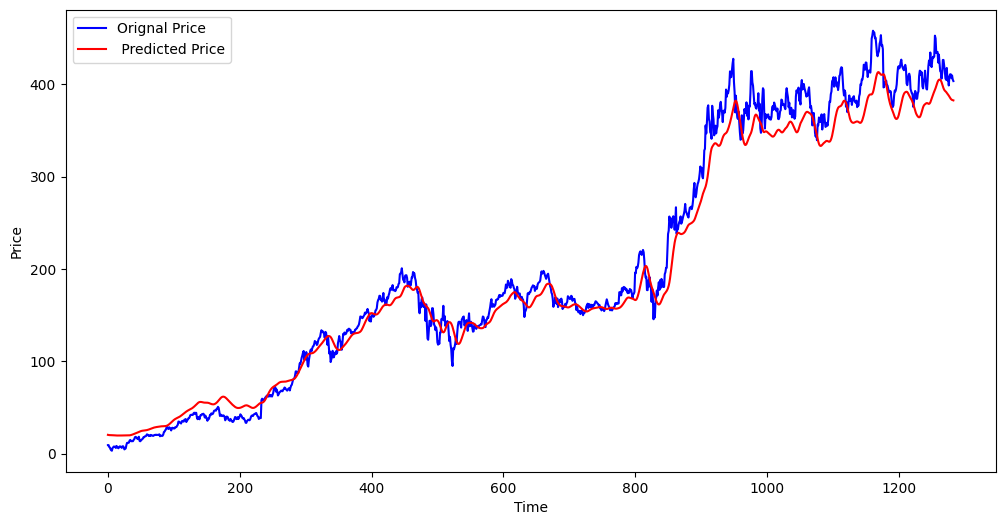

In [89]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'r', label = ' Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

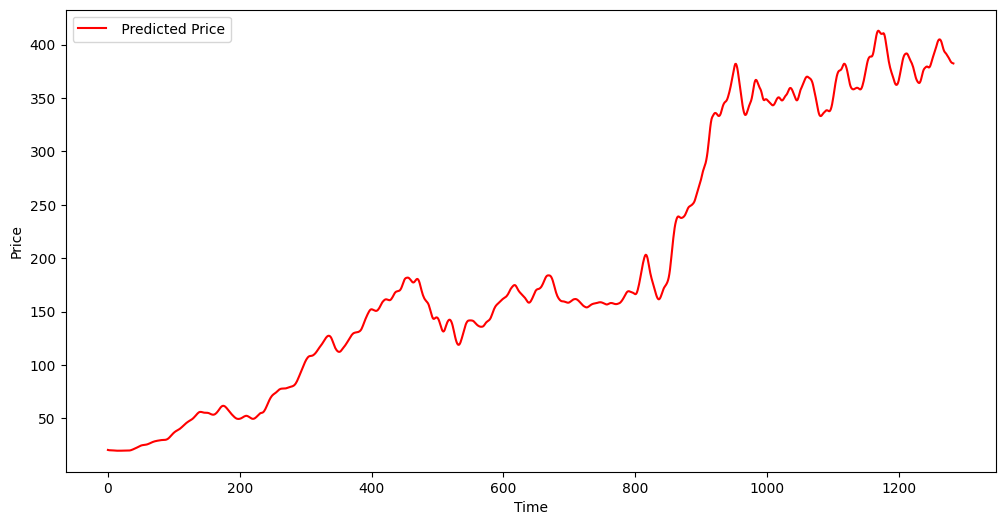

In [90]:
plt.figure(figsize = (12,6))
plt.plot(y_predicted, 'r', label = ' Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

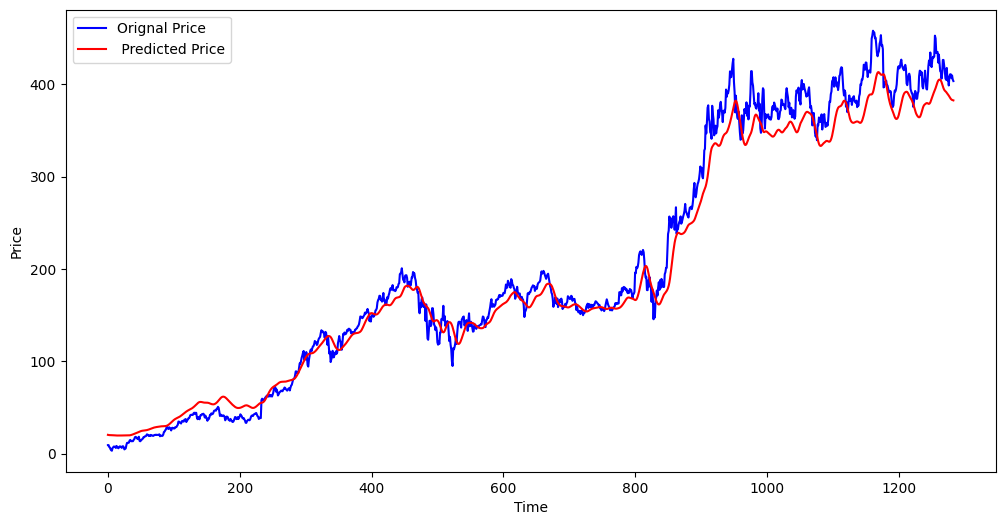

In [91]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'r', label = ' Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [92]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_predicted)
rmse = sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 20.474853261043716
